In [54]:
!which python
!which jupyter
!pwd
 
import os, sys, time
import pandas as pd
#!pip install geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
print(matplotlib.matplotlib_fname())
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/HongX/anaconda3/envs/py36quant/bin/python
/Users/HongX/anaconda3/envs/py36quant/bin/jupyter
/Users/HongX/X.Codes/finance.quant
/Users/HongX/anaconda3/envs/py36quant/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [55]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [180]:
path2 = r'/Users/HongX/X.Codes/finance.quant/全部分布城市2018年度GDP.xlsx'
df_gdp_raw = pd.read_excel(path2)

In [185]:
#path = r'/Users/HongX/X.Codes/finance.quant/总台账636.xlsx'
path = r'/Users/HongX/X.Codes/finance.quant/总台账GDP.xlsx'

df = pd.read_excel(path)
df_sub = df[['公司名称','省份','城市', '区县', '一级行业','二级行业','2018年GDP（亿元）', '注册资本（万元）','成立日期','公司类型','Longitude','Latitude']]
print (df_sub.shape)
df_sub.head(5)

(636, 12)


,公司名称,省份,城市,区县,一级行业,二级行业,2018年GDP（亿元）,注册资本（万元）,成立日期,公司类型,Longitude,Latitude
0,常州武进综合保税区投资建设有限公司,江苏省,常州市,江苏省 常州市 武进区,租赁和商务服务业,商务服务业,7050.27,100000.00,20151216.00,有限责任公司(国有独资),119.88,31.57
1,丹阳市齐梁高科发展有限公司,江苏省,镇江市,江苏省镇江市丹阳市,科学研究和技术服务业,研究和试验发展,4050.00,20000.00,20150615.00,有限责任公司（非自然人投资或控股的法人独资）,119.60,32.01
2,建湖兴业农业发展有限公司,江苏省,盐城市,江苏省盐城市建湖县,农、林、牧、渔业,农业,5487.08,12000.00,20150907.00,有限责任公司,119.85,33.48
3,新昌县教育发展有限公司,浙江省,绍兴市,浙江省 绍兴市 新昌县,租赁和商务服务业,商务服务业,5382.72,1000.00,20020219.00,有限责任公司（非自然人投资或控股的法人独资）,120.98,29.40
4,镇江五洲实业发展有限公司,江苏省,镇江市,江苏省 镇江市 润州区,综合,综合,4050.00,30000.00,20170707.00,有限责任公司（非自然人投资或控股的法人独资）,119.40,32.20


In [ ]:
ranges = [20151215,20151220,20151225,20151231, 20160101]
df_year = df_sub.groupby(pd.cut(df['成立日期'], ranges)).count()
df_year

In [217]:
#GDP 分布
df_sub[['2018年GDP（亿元）']].describe()

,2018年GDP（亿元）
count,635.00
mean,7793.00
std,4543.11
min,540.78
25%,4146.93
50%,6755.23
75%,11438.62
max,24221.98


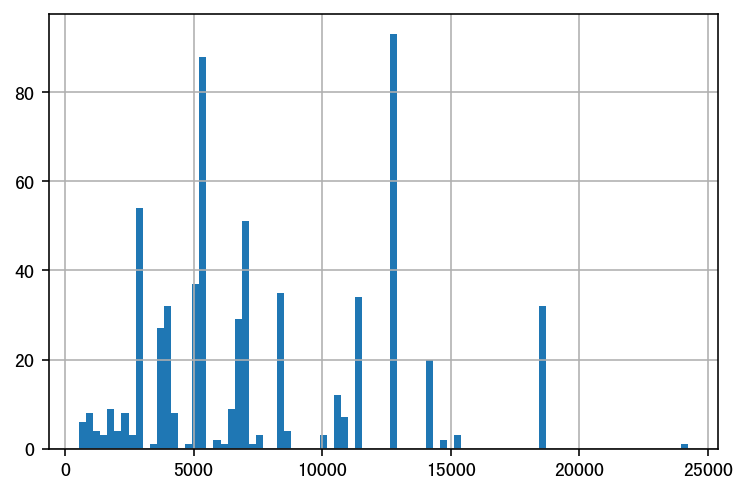

In [204]:
df_sub['2018年GDP（亿元）'].hist(bins=86)

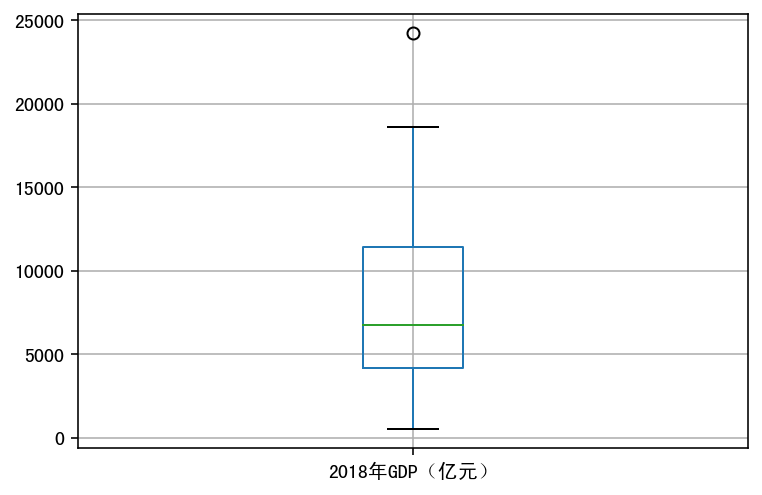

In [215]:
df_sub[['2018年GDP（亿元）']].boxplot()

In [106]:
df_type = df_sub.groupby(['公司类型']).count()
df_type_count = df_type[['公司名称']].sort_values(by='公司名称', ascending=False)
df_type_count['占比(%)'] = df_type_count.apply(lambda row: round(100*row[0]/636, 2), axis=1)
df_type_count

,公司名称,占比(%)
公司类型,,
有限责任公司(国有独资),196,30.82
有限责任公司（非自然人投资或控股的法人独资）,167,26.26
有限责任公司,110,17.30
其他有限责任公司,31,4.87
有限责任公司(国有控股),23,3.62
有限责任公司(自然人投资或控股),18,2.83
全民所有制,15,2.36
其他股份有限公司(非上市),14,2.20
其他股份有限公司(上市),6,0.94


In [107]:
df_group = df_sub.groupby(['一级行业']).count()
df_industry_count = df_group[['公司名称']].sort_values(by='公司名称', ascending=False)
df_industry_count['占比(%)'] = df_industry_count.apply(lambda row: round(100*row[0]/636, 2), axis=1)
df_industry_count

,公司名称,占比(%)
一级行业,,
建筑业,237,37.26
租赁和商务服务业,91,14.31
综合,77,12.11
金融业,68,10.69
房地产业,61,9.59
批发和零售业,22,3.46
制造业,22,3.46
交通运输、仓储和邮政业,15,2.36
水利、环境和公共设施管理业,11,1.73


In [163]:
df_group2 = df_sub.groupby(['一级行业', '二级行业']).count()
df_industry_count2 = df_group2[['公司名称']].sort_values(by='公司名称', ascending=False)
df_industry_count2['占比(%)'] = df_industry_count2.apply(lambda row: round(100*row[0]/636, 2), axis=1)
df_industry_count2#.head(20)   #显示前面20行

公司名称  占比(%)
一级行业             二级行业                         
建筑业              土木工程建筑业            203  31.92
租赁和商务服务业         商务服务业               85  13.36
综合               综合                  77  12.11
房地产业             房地产业                61   9.59
金融业              货币金融服务              34   5.35
                 其他金融业               24   3.77
建筑业              房屋建筑业               23   3.62
批发和零售业           零售业                 11   1.73
                 批发业                 11   1.73
金融业              资本市场服务              10   1.57
交通运输、仓储和邮政业      道路运输业               10   1.57
建筑业              建筑装饰和其他建筑业          10   1.57
水利、环境和公共设施管理业    公共设施管理业              6   0.94
租赁和商务服务业         租赁业                  6   0.94
电力、热力、燃气及水生产和供应业 水的生产和供应业             6   0.94
水利、环境和公共设施管理业    生态保护和环境治理业           5   0.79
制造业              专用设备制造业              4   0.63
交通运输、仓储和邮政业      水上运输业                4   0.63
制造业              医药制造业                3   0.47
农、林、牧、渔业         农业                   3   0.47
制造业              计算机、通信和其他电子设备制造业     2   0.31
文化、体育和娱乐业        娱乐业                  2   0.31
信息传输、软件和信息技术服务业  电信、广播电视和卫星传输服务       2   0.31
科学研究和技术服务业       研究和试验发展              2   0.31
                 科技推广和应用服务业           2   0.31
制造业              食品制造业                2   0.31
                 非金属矿物制品业             2   0.31
电力、热力、燃气及水生产和供应业 电力、热力生产和供应业          2   0.31
制造业              酒、饮料和精制茶制造业          2   0.31
科学研究和技术服务业       专业技术服务业              2   0.31
电力、热力、燃气及水生产和供应业 燃气生产和供应业             1   0.16
采矿业              开采辅助活动               1   0.16
                 煤炭开采和洗选业             1   0.16
交通运输、仓储和邮政业      仓储业                  1   0.16
文化、体育和娱乐业        新闻和出版业               1   0.16
                 广播、电视、电影和影视录音制作业     1   0.16
卫生和社会工作          卫生                   1   0.16
制造业              黑色金属冶炼和压延加工业         1   0.16
                 金属制品业                1   0.16
                 纺织服装、服饰业             1   0.16
                 纺织业                  1   0.16
                 电气机械和器材制造业           1   0.16
                 汽车制造业                1   0.16
                 农副食品加工业              1   0.16
农、林、牧、渔业         农、林、牧、渔服务业           1   0.16
信息传输、软件和信息技术服务业  软件和信息技术服务业           1   0.16
                 互联网和相关服务             1   0.16
住宿和餐饮业           餐饮业                  1   0.16
                 住宿业                  1   0.16
建筑业              建筑安装业                1   0.16

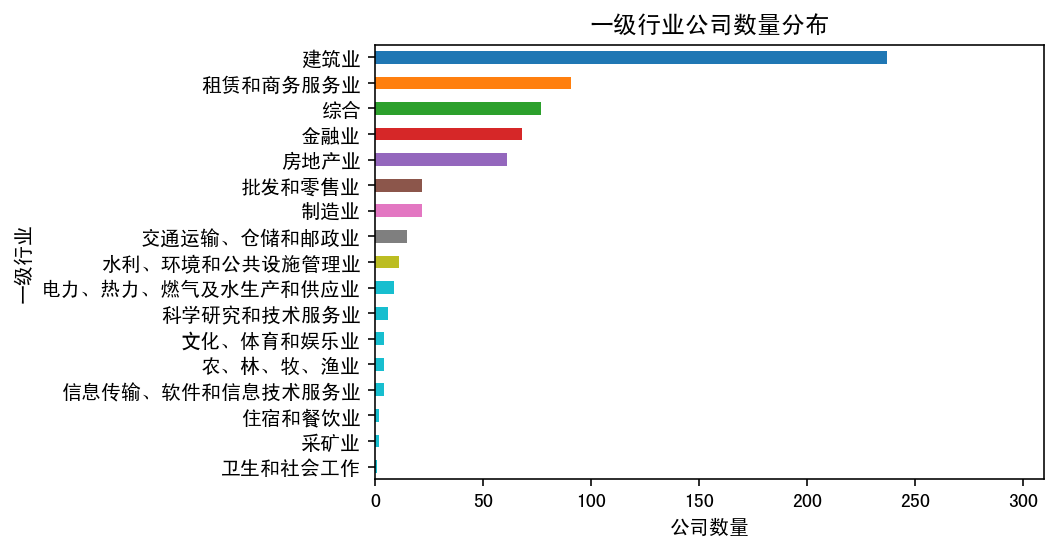

In [109]:
fig, ax =plt.subplots()
colormap = plt.cm.tab10(range(0, len(df_industry_count['公司名称'])))
ax = df_industry_count['公司名称'].plot.barh(stacked=False, color=colormap)
ax.invert_yaxis()
ax.set_xlim(0, 310)
ax.set_xlabel('公司数量')
ax.set_title('一级行业公司数量分布')
plt.show()

In [110]:
list(df_industry_count.index.values)

['建筑业',
 '租赁和商务服务业',
 '综合',
 '金融业',
 '房地产业',
 '批发和零售业',
 '制造业',
 '交通运输、仓储和邮政业',
 '水利、环境和公共设施管理业',
 '电力、热力、燃气及水生产和供应业',
 '科学研究和技术服务业',
 '文化、体育和娱乐业',
 '农、林、牧、渔业',
 '信息传输、软件和信息技术服务业',
 '住宿和餐饮业',
 '采矿业',
 '卫生和社会工作']

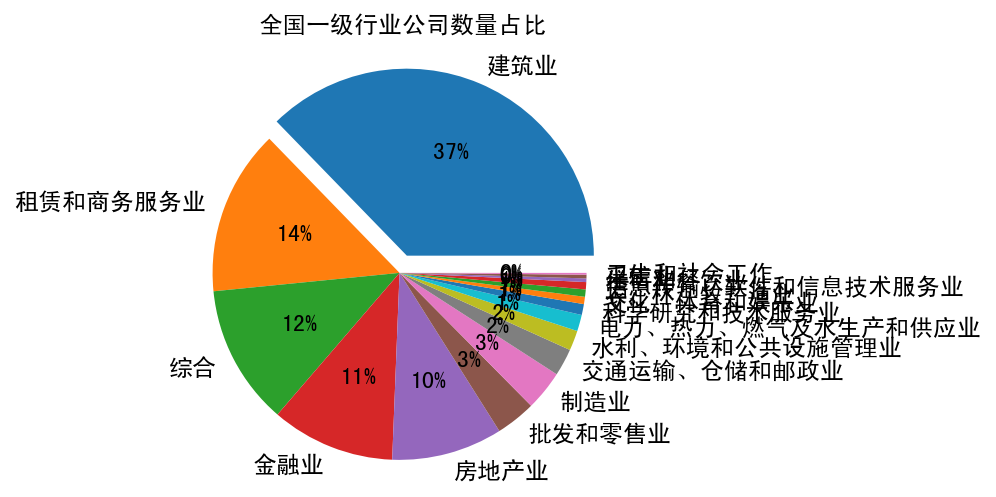

In [111]:
#定义饼状图的标签，标签是列表
labels =list(df_industry_count.index.values)

#每个标签占多大，会自动去算百分比
x = list(df_industry_count['公司名称'])

#0.1表示将B那一块凸显出来
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 

# 绘制饼图,autopct='%.0f%%' 显示百分比
# textprops = {'fontsize':30, 'color':'k'} 大小为30，颜色为黑色
# explode=explode 将B那一块凸显出来
plt.pie(x,labels=labels,autopct='%.0f%%', 
textprops = {'fontsize':12, 'color':'k'},explode=explode)

# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.title('全国一级行业公司数量占比')
plt.show()

In [164]:
#df_group2 = df_sub.groupby(['省份', '城市']).count()
df_group3 = df_sub.groupby(['省份']).count()
df_city_count3 = df_group3[['公司名称']].sort_values(by='公司名称', ascending=False)
df_city_count3['占比(%)'] = df_city_count3.apply(lambda row: round(100*row[0]/636, 2), axis=1)
df_city_count3
df_city_count3_noJS =df_city_count3[1::]
df_city_count3

,公司名称,占比(%)
省份,,
江苏省,478,75.16
浙江省,43,6.76
山东省,30,4.72
上海市,25,3.93
北京市,16,2.52
河南省,6,0.94
天津市,5,0.79
辽宁省,5,0.79
湖南省,5,0.79


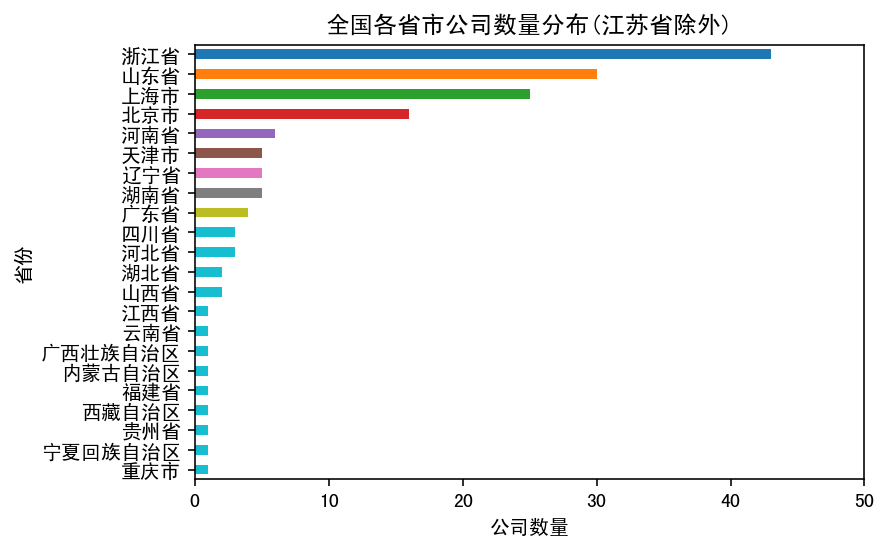

In [162]:
fig, ax =plt.subplots()
colormap = plt.cm.tab10(range(0, len(df_city_count3_noJS)))
ax = df_city_count3_noJS['公司名称'].plot.barh(stacked=False, color=colormap)
ax.invert_yaxis()
ax.set_xlim(0, 50)
ax.set_xlabel('公司数量')
ax.set_title('全国各省市公司数量分布(江苏省除外)')
plt.show()

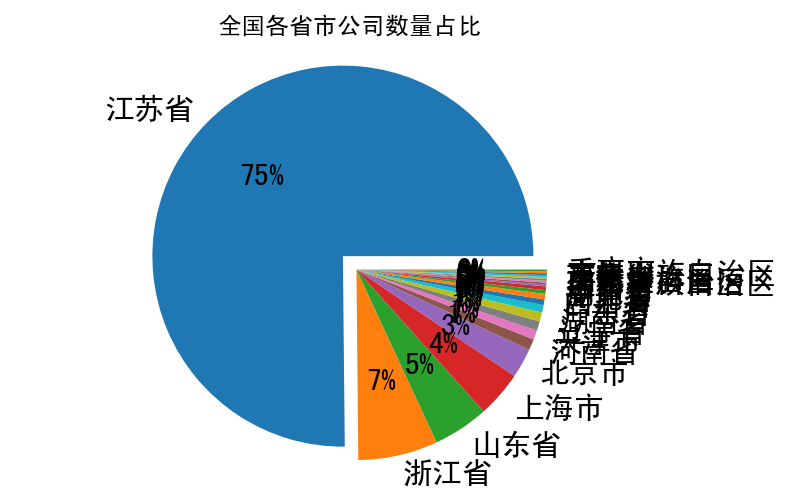

In [112]:
#定义饼状图的标签，标签是列表
labels =list(df_city_count3.index.values)

#每个标签占多大，会自动去算百分比
x = list(df_city_count3['公司名称'])

#0.1表示将B那一块凸显出来
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) 

# 绘制饼图,autopct='%.0f%%' 显示百分比
# textprops = {'fontsize':30, 'color':'k'} 大小为30，颜色为黑色
# explode=explode 将B那一块凸显出来
plt.pie(x,labels=labels,autopct='%.0f%%', 
textprops = {'fontsize':15, 'color':'k'},explode=explode)

# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.title('全国各省市公司数量占比')
plt.show()

In [171]:
df_group4 = df_sub.groupby(['省份', '城市']).count()
df_city_count4 = df_group4[['公司名称']].sort_values(by='公司名称', ascending=False)
df_city_count4['占比(%)'] = df_city_count4.apply(lambda row: round(100*row[0]/939, 2), axis=1)
df_city_count4#.head(20) #显示前面20行

df_group4city = df_sub.groupby(['城市']).count()
df_group4city

,公司名称,省份,区县,一级行业,二级行业,注册资本,成立日期,公司类型,Longitude,Latitude
城市,,,,,,,,,,
东丽区,1,1,1,1,1,1,1,1,1,1
东城区,2,2,2,2,2,2,2,2,2,2
东莞市,1,1,1,1,1,1,1,1,1,1
东营市,1,1,1,1,1,1,1,1,1,1
临沂市,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
静安区,2,2,2,2,2,2,2,2,2,2
顺义区,2,2,2,2,2,2,2,2,2,2
驻马店市,1,1,1,1,1,1,1,1,1,1


In [69]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
df_group5 = df_sub.groupby(['省份']).mean()
df_group5.sort_values(by='注册资本', ascending=False)

,注册资本,成立日期,Longitude,Latitude
省份,,,,
山西省,1143664.58,19915910.00,112.93,38.91
河北省,555064.86,20000943.33,116.61,38.55
辽宁省,523174.30,20002577.00,122.32,39.81
西藏自治区,500000.00,20150525.00,91.17,29.66
广西壮族自治区,500000.00,19970328.00,110.20,25.25
河南省,458336.33,20035598.33,113.91,34.56
北京市,454538.10,19970817.75,116.36,39.97
广东省,424581.26,20025515.75,114.36,22.99
云南省,414221.44,20050428.00,102.71,25.04


In [114]:
df_group4 = df_sub.groupby(['一级行业']).mean()
df_group4.sort_values(by='注册资本', ascending=False)

,注册资本,成立日期,Longitude,Latitude
一级行业,,,,
采矿业,866732.08,20005559.50,116.78,36.05
交通运输、仓储和邮政业,494829.34,20020046.40,119.88,32.79
综合,404196.01,20027478.83,118.71,33.27
建筑业,284447.74,20049486.43,119.19,32.70
金融业,267940.20,20056121.88,117.94,31.84
制造业,246141.48,20007888.95,118.97,33.98
电力、热力、燃气及水生产和供应业,201985.14,19998451.22,118.58,33.47
批发和零售业,164218.32,20045304.77,119.47,33.04
住宿和餐饮业,152041.74,20045211.50,117.37,30.96


In [72]:
# -*- coding:utf-8 -*- 
#获取地理位置信息

def getAddressLog(address): 
    #address = "江苏省 宿迁市 宿城区"
    gps = Nominatim(timeout=3)
    print (address['区县'])
    location = gps.geocode(address['区县'])
    #time.sleep(1)
    if location is not None:
        return location.longitude#, location.latitude
    else:
        return 0

def getAddressLat(address):
    #address = "江苏省 宿迁市 宿城区"
    gps = Nominatim(timeout=3)
    print (address['区县'])
    #geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    #location = address['区县'].apply(geocode)
    location = gps.geocode(address['区县'])
    time.sleep(1)
    if location is not None:
        return location.latitude #, location.latitude
    else:
        return 0

In [ ]:
df_map = df_sub
#df_map['Longitude'] = df_map.apply(lambda row: getAddressLog(row), axis=1)
#df_map['Latitude'] = df_map.apply(lambda row: getAddressLat(row), axis=1)
#df_map.head()

In [245]:
from sklearn.cluster import KMeans
#Define a kMean function:
def kMeans_func(X, clusters=2):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(X)
    return kmeans.labels_

In [286]:
X = df_sub[['2018年GDP（亿元）', 'Longitude', 'Latitude', '一级行业', '注册资本（万元）']]
X

,2018年GDP（亿元）,Longitude,Latitude,一级行业,注册资本（万元）
0,7050.27,119.88,31.57,租赁和商务服务业,100000.00
1,4050.00,119.60,32.01,科学研究和技术服务业,20000.00
2,5487.08,119.85,33.48,农、林、牧、渔业,12000.00
3,5382.72,120.98,29.40,租赁和商务服务业,1000.00
4,4050.00,119.40,32.20,综合,30000.00
...,...,...,...,...,...
631,4367.76,118.35,35.10,建筑业,150000.00
632,5487.08,120.15,33.40,建筑业,300000.00
633,6479.50,116.29,39.96,综合,1000000.00
634,8427.00,120.89,31.98,综合,857546.00


In [291]:
X['一级行业'] = pd.Categorical(X['一级行业'])
X['一级行业代码'] = X['一级行业'].cat.codes
X.drop(['一级行业'], axis=1, inplace=True)

/Users/HongX/anaconda3/envs/py36quant/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HongX/anaconda3/envs/py36quant/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/HongX/anaconda3/envs/py36quant/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

2018年GDP（亿元）    float64
Longitude       float64
Latitude        float64
注册资本（万元）        float64
一级行业代码             int8
dtype: object

In [ ]:
X.dropna(inplace=True)

norm_X=(X-X.min())/(X.max()-X.min())

In [294]:
norm_X.drop(['Longitude', 'Latitude'], axis=1, inplace=True)
norm_X

,2018年GDP（亿元）,注册资本（万元）,一级行业代码
0,0.27,0.02,0.81
1,0.15,0.00,0.75
2,0.21,0.00,0.19
3,0.20,0.00,0.81
4,0.15,0.00,0.88
...,...,...,...
631,0.16,0.02,0.38
632,0.21,0.05,0.38
633,0.25,0.16,0.88
634,0.33,0.14,0.88


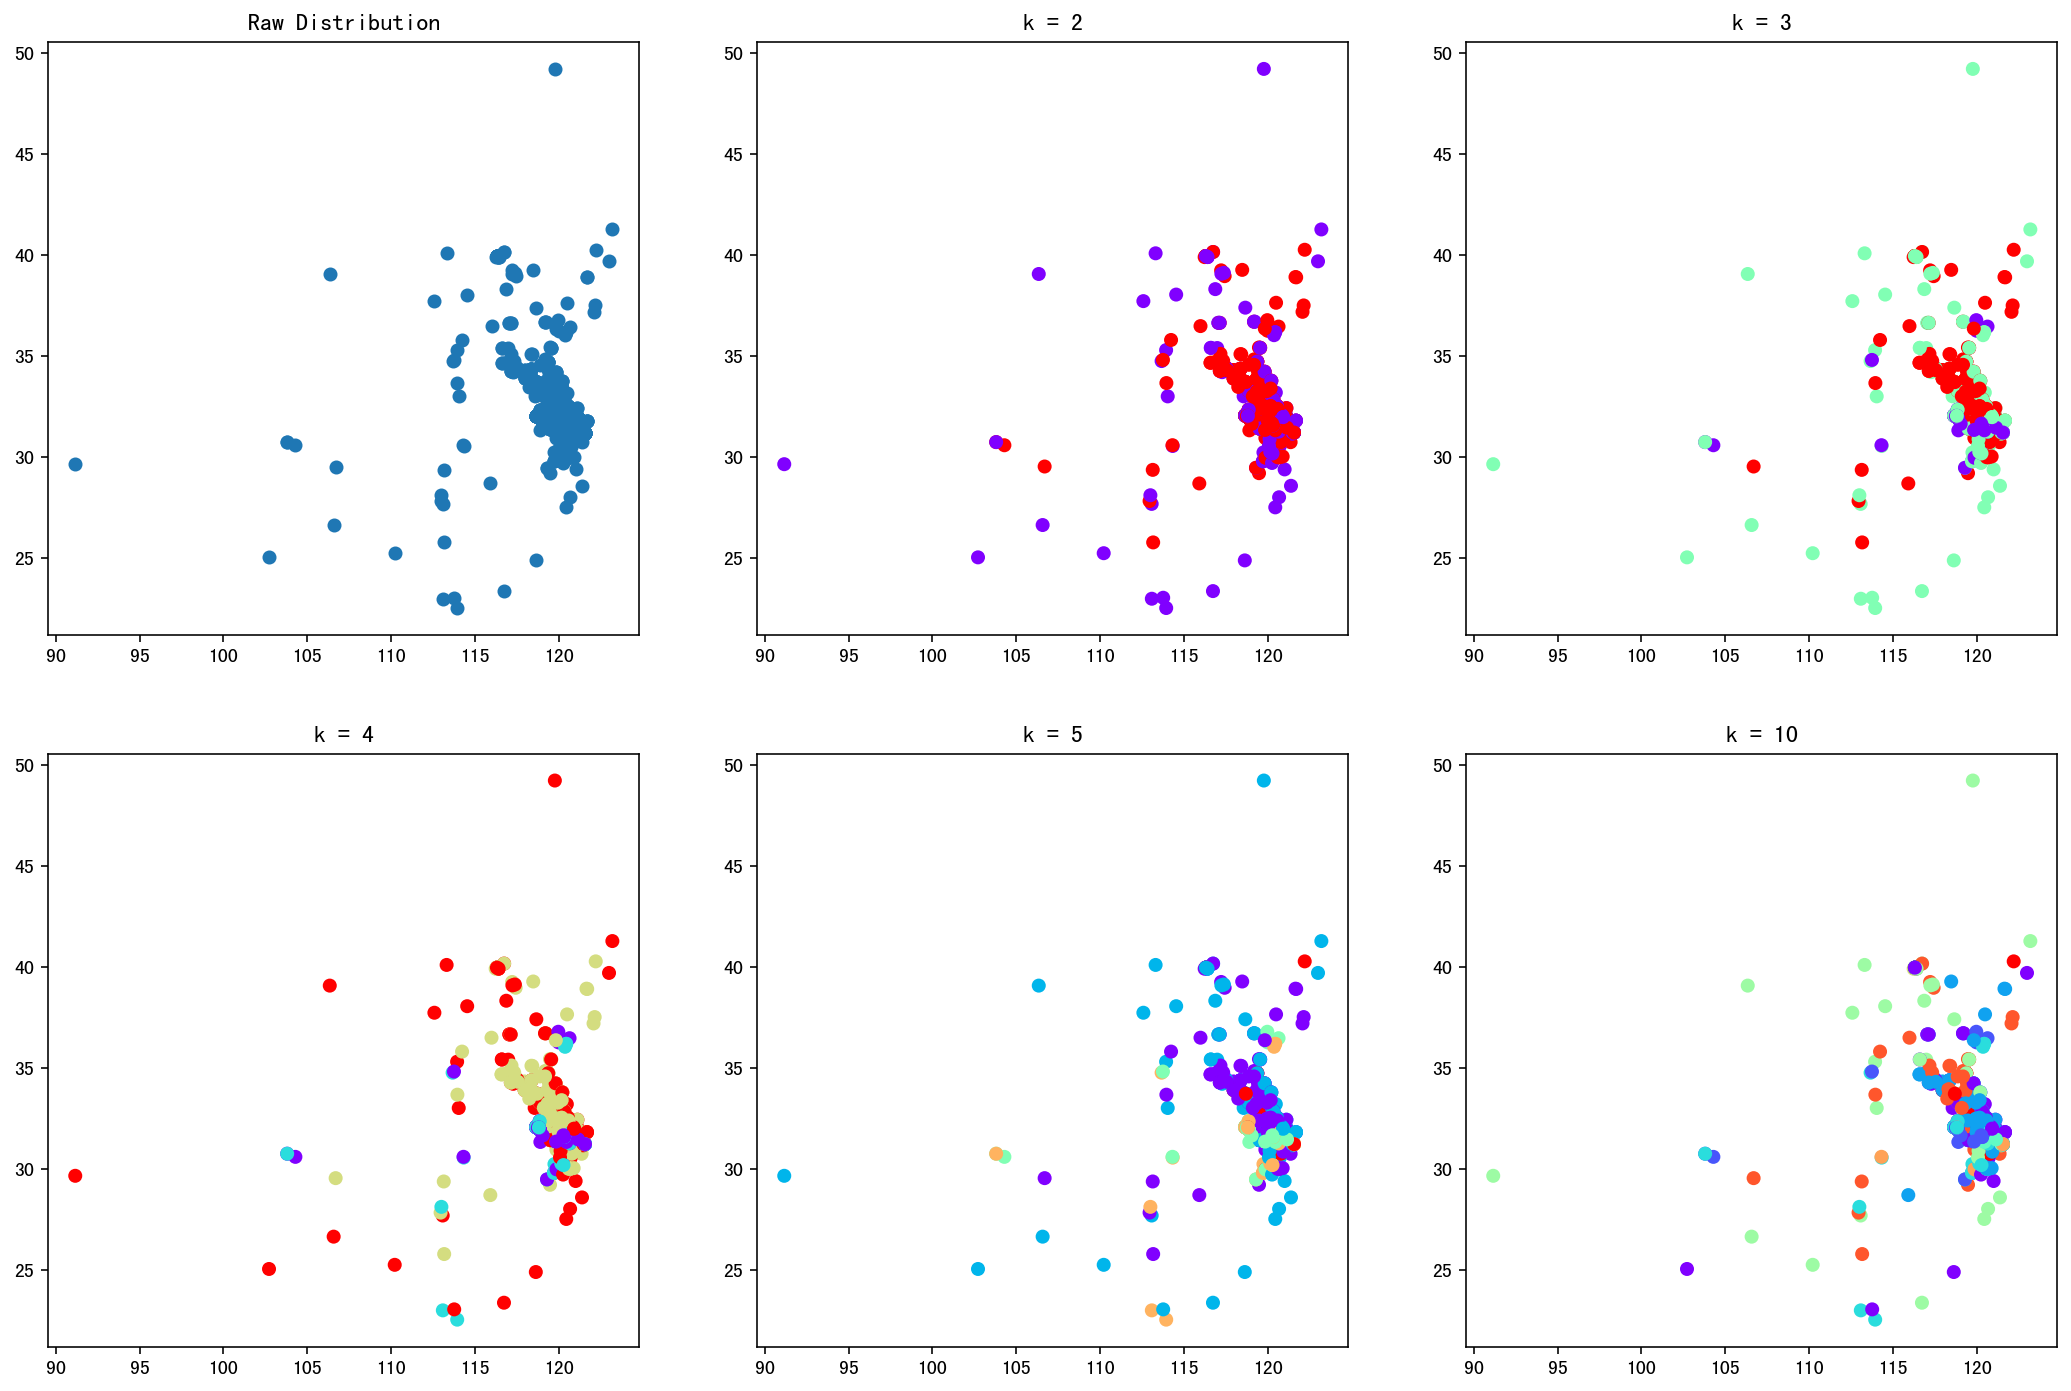

In [295]:
#Plot the kMean Results with different k value:
plt.figure(figsize=(18,12))
#plt.axis([0, 5, 0, 5])
plt.grid(True)

ax1 = plt.subplot(2, 3, 1)
plt.scatter(X['Longitude'],X['Latitude'])
ax1.set_title("Raw Distribution")

ax2 = plt.subplot(2, 3, 2)
plt.scatter(X['Longitude'],X['Latitude'], c=kMeans_func(norm_X, clusters=2), cmap='rainbow')
ax2.set_title("k = 2")

ax3 = plt.subplot(2, 3, 3)
plt.scatter(X['Longitude'],X['Latitude'], c=kMeans_func(norm_X, clusters=3), cmap='rainbow')
ax3.set_title("k = 3")

ax4 = plt.subplot(2, 3, 4)
plt.scatter(X['Longitude'],X['Latitude'], c=kMeans_func(norm_X, clusters=4), cmap='rainbow')
ax4.set_title("k = 4")

ax5 = plt.subplot(2, 3, 5)
plt.scatter(X['Longitude'],X['Latitude'], c=kMeans_func(norm_X, clusters=5), cmap='rainbow')
ax5.set_title("k = 5")

ax6 = plt.subplot(2, 3, 6)
plt.scatter(X['Longitude'],X['Latitude'], c=kMeans_func(norm_X, clusters=10), cmap='rainbow')
ax6.set_title("k = 10")

plt.show()

In [230]:
#df_map_noJS = df_sub[df['省份']!='江苏省']
df_map_noJS = df.loc[df['省份'] != '江苏省']
df_map_noJS

df_map_onlyRE = df.loc[df['一级行业'] == '房地产业']
df_map_onlyManu = df.loc[df['一级行业'] == '建筑业']

df_map_25per = df_sub.loc[df['2018年GDP（亿元）'] >4146.93 ]
df_map_25per = df_map_25per.loc[df['2018年GDP（亿元）'] <11438.62 ]

In [74]:
#df_map.to_csv('/Users/HongX/Desktop/Total_corp_info_637_long_lat.csv', encoding='utf_8_sig')

In [313]:
#画地图
#!conda install -c conda-forge folium=0.5.0 --yes #install folium package 把#号去掉
import folium # map rendering library, 
import math

df_map = df_sub#df_map_25per#df_sub#df_map_onlyRE #df_sub#df_map_onlyManu #df_sub #df_map_onlyRE#df_sub#df_map_noJS#df_sub

#initial  display location
latitude=31.224361
longitude=121.469170

# create map of Toronto using latitude and longitude values
map_china = folium.Map(location=[latitude, longitude], zoom_start=5)
                       #tiles="http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=7&x={x}&y={y}&z={z}", attr='default')

#color_dict = {u'建筑业':'red', u'租赁和商务服务业':'blue',u'房地产业':'green',u'综合':'purple',u'金融业':'orange',u'制造业':'darkblue',u'批发和零售业':'darkgreen',
#              u'水利、环境和公共设施管理业':'cadetblue', u'交通运输、仓储和邮政业':'darkpurple',u'电力、热力、燃气及水生产和供应业':'pink',u'科学研究和技术服务业':'lightblue','信息传输、软件和信息技术服务业':'lightgreen',
#             u'农、林、牧、渔业':'grey',u'文化、体育和娱乐业':'darkred',u'住宿和餐饮业':'lightred',u'采矿业':'beige',u'居民服务、修理和其他服务业':'red',u'卫生和社会工作':'black', 'nan':'white'}



#color_dict = {u'建筑业':'red', u'租赁和商务服务业':'blue',u'房地产业':'green',u'综合':'purple',u'金融业':'orange'}
#color_dict = {u'建筑业':'#ff33c5', u'制造业':'red', u'租赁和商务服务业':'blue',u'房地产业':'green',u'批发和零售业':'purple',u'金融业':'orange'}
color_dict = {u'建筑业':'#fa8cefff', u'制造业':'red', u'租赁和商务服务业':'blue',u'房地产业':'green',u'批发和零售业':'purple',u'金融业':'orange'}
#color_dict = {u'房地产业':'green'}

# add markers to map
for lat, lng, corp, capital, industry in zip(df_map['Latitude'], df_map['Longitude'], df_map['公司名称'],df_map['注册资本（万元）'], df_map['一级行业'],):
    label = '{}, {}'.format(corp, capital)
    label = folium.Popup(label, parse_html=True)

    try:
        set_color = color_dict[industry]
    except:
        set_color = 'grey'
        
    #print (color_dict[industry])    
    folium.CircleMarker(
        [lat, lng],
        radius=2, #capital/(1000000*0.1),
        popup=label,
        color=set_color,
        fill=True,
        fill_color=set_color,
        fill_opacity=0.1,
        parse_html=True).add_to(map_china)  
    
html_string = map_china._repr_html_()

file= open("map_china.html","w")
#write then close file
file.write(html_string)
file.close()

map_china